In [139]:
import pandas as pd
import requests 
import json 
import csv 
import time
import datetime
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

df_p = pd.read_csv('../data/askphilosophy.csv', index_col=0)
df_c = pd.read_csv('../data/changemyview.csv', index_col=0)

df_c['title'] =  df_c['title'].replace(to_replace ='CMV: ', value = '', regex = True)
df_c['title'] =  df_c['title'].replace(to_replace ='CMC: ', value = '', regex = True)
df_c['title'] =  df_c['title'].replace(to_replace ='Cmv: ', value = '', regex = True)
df_c['title'] =  df_c['title'].replace(to_replace ='cmv: ', value = '', regex = True)

df = df_c.append(df_p)

# df['subreddit'] = df['subreddit'].replace({'askphilosophy':0, 'changemyview': 1})
df['subreddit'] = df['subreddit'].replace({'askphilosophy':1, 'changemyview': 0})

X = df['title']
y = df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [140]:
pipe = make_pipeline(CountVectorizer(stop_words = 'english', max_features = 500),
                    StandardScaler(with_mean = False),
                    DecisionTreeClassifier())

In [141]:
pg = {
    #'decisiontreeclassifier__max_depth': [2, 3, 5, 7],
    #'decisiontreeclassifier__min_samples_split': [5, 10, 15, 20], 
    'decisiontreeclassifier__min_samples_leaf': [2, 3, 4, 5, 6],
    'decisiontreeclassifier__ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10]
}

In [142]:
gs = GridSearchCV(pipe, pg, n_jobs=-1)
gs.fit(X_train, y_train)
print('train score: ' + str(gs.score(X_train, y_train)))
print('test score: ' + str(gs.score(X_test, y_test)))
print('best params: ' + str(gs.best_params_))

train score: 0.8768509212730319
test score: 0.8235175879396985
best params: {'decisiontreeclassifier__ccp_alpha': 0, 'decisiontreeclassifier__min_samples_leaf': 2}


In [143]:
predics = gs.predict(X_test)

In [144]:
tn, fp, fn,tp = confusion_matrix(y_test, predics).ravel()
print(tn, fp, fn,tp)

2192 304 574 1905


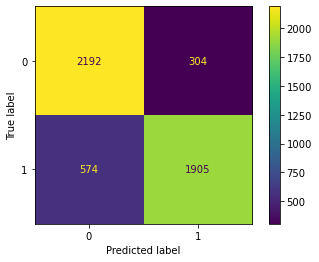

In [145]:
plot_confusion_matrix(gs, X_test,  y_test)

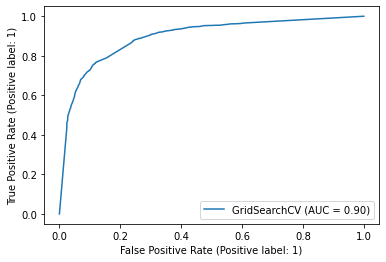

In [146]:
plot_roc_curve(gs, X_test, y_test);

In [147]:
precision = tp / (tp+fp)
recall = tp / (tp+fn)
specificity = tn/(tn+fp)
balanced_accuracy = (specificity + recall)/2
ac = accuracy_score(y_test, predics)
fpr = fp / (fp+tn) # False Positive Rate 
print(f" Precision: {precision}")
print(f" Recall: {recall}")
print(f" Specificity: {recall}")
print(f" Balanced Accuracy: {balanced_accuracy}")
print(f" Accuracy Score: {ac}")
print(f" False Positive Rate : {fpr}")

 Precision: 0.8623811679492983
 Recall: 0.7684550221863655
 Specificity: 0.7684550221863655
 Balanced Accuracy: 0.8233300751957469
 Accuracy Score: 0.8235175879396985
 False Positive Rate : 0.12179487179487179
